In [3]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
raw_data = loadmat("C:\svm_data1.mat")

In [5]:
raw_data['X'].shape

(51, 2)

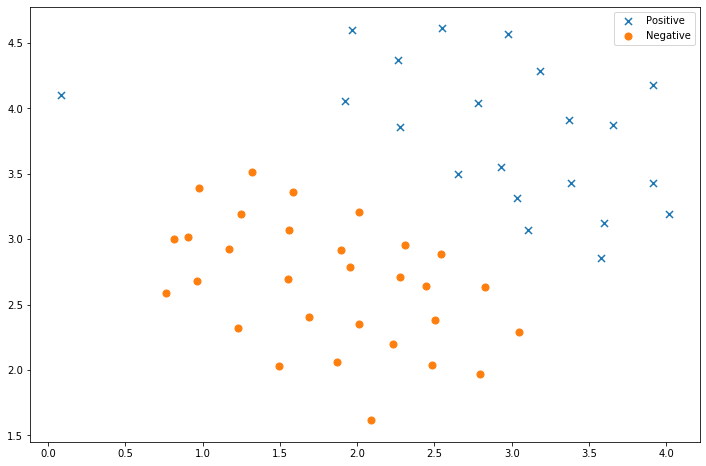

In [7]:
data = pd.DataFrame(raw_data['X'],columns =['X1', 'X2'])
data['y'] = raw_data['y']
positive  = data[data['y'].isin([1])]
negative  = data[data['y'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'],positive['X2'], s =50,marker= 'x',label='Positive')
ax.scatter(negative['X1'],negative['X2'], s =50,marker= 'o',label='Negative')
ax.legend()

In [8]:
from sklearn import svm

In [9]:
SVC = svm.LinearSVC(C= 1,max_iter = 1000)

In [10]:
SVC.fit(data[['X1','X2']],data['y'])
SVC.score(data[['X1','X2']],data['y'])


0.9803921568627451

In [17]:
SVC = svm.LinearSVC(C= 1000,max_iter = 1000000)

In [18]:
SVC.fit(data[['X1','X2']],data['y'])
SVC.score(data[['X1','X2']],data['y'])


1.0

In [19]:
raw_data = loadmat("C:\svm_data2.mat")

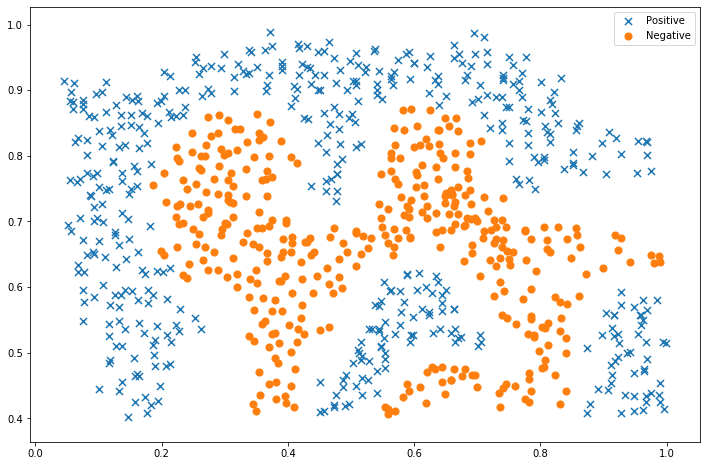

In [20]:
data = pd.DataFrame(raw_data['X'],columns =['X1', 'X2'])
data['y'] = raw_data['y']
positive  = data[data['y'].isin([1])]
negative  = data[data['y'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'],positive['X2'], s =50,marker= 'x',label='Positive')
ax.scatter(negative['X1'],negative['X2'], s =50,marker= 'o',label='Negative')
ax.legend()

In [28]:
SVC = svm.SVC()

In [29]:
SVC = svm.SVC(C=0.3,gamma = 100)

In [30]:
SVC.fit(data[['X1', 'X2']],data['y'])

SVC(C=0.3, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
SVC.score(data[['X1', 'X2']],data['y'])

0.9918887601390498

In [32]:
parameters = {'kernel':('linear','rbf'),
             'C':[0.01,0.03,0.1,0.3,1,3,10,30,100],
             'gamma':[0.01,0.03,0.1,0.3,1,3,10,30,50,100]}

In [33]:
SVC = svm.SVC()

In [34]:
parameters = {'kernel':('linear','rbf'),
             'C':[0.01,0.03,0.1,0.3,1,3,10,30,100],
             'gamma':[0.01,0.03,0.1,0.3,1,3,10,30,50,100]}

In [38]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(),parameters, cv =5)

In [39]:
clf.fit(data[['X1', 'X2']],data['y'])

C:\Users\Devendra Pathak\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
                         'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 50, 100],
                         'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_gamma', 'param_kernel', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [41]:
clf.score(data[['X1', 'X2']],data['y'])

0.996523754345307